Notebook to generate tables to be used in the model pipeline in the context of mutation status

In [65]:
import pandas as pd
import numpy as np

import glob

import matplotlib.pyplot as plt
from matplotlib import rc

from CMP_functions.preprocessing import *

In [66]:
gene_symbol = 'TP53'

In [67]:
df = pd.read_csv('../data/mutations_20191101.csv')

# filt = df.gene_symbol==gene_symbol
filt = (df.gene_symbol==gene_symbol)&(df.cancer_driver == True)

df_gene = df[filt]
positive_models = set(df_gene.model_id)

In [69]:
df_gene

,gene_id,gene_symbol,model_id,protein_mutation,rna_mutation,cdna_mutation,cancer_driver,model_name
960668,SIDG38363,TP53,SIDM01297,p.R248Q,r.933g>a,c.743G>A,True,COLO_037
960669,SIDG38363,TP53,SIDM01290,p.?,r.749+1g>a,c.559+1G>A,True,OESO_034
960670,SIDG38363,TP53,SIDM01291,p.E286K,r.1046g>a,c.856G>A,True,OESO_036
960671,SIDG38363,TP53,SIDM01305,p.G245S,r.923g>a,c.733G>A,True,COLO_155
960672,SIDG38363,TP53,SIDM01274,p.G244D,r.921g>a,c.731G>A,True,OESO_167
...,...,...,...,...,...,...,...,...
961442,SIDG38363,TP53,SIDM00860,p.R248L,r.933g>u,c.743G>T,True,FADU
961443,SIDG38363,TP53,SIDM00860,p.?,r.863-1g>a,c.673-1G>A,True,FADU
961444,SIDG38363,TP53,SIDM01144,p.?,r.973-2a>c,c.783-2A>C,True,SNU-5
961445,SIDG38363,TP53,SIDM00472,p.G244D,r.921g>a,c.731G>A,True,PEO1


In [68]:
img_folder = '../data/images_jpeg/'

model_info = pd.read_csv('../data/images_info_table.csv')
im_SIDM_dict = dict(zip(model_info.im_id, model_info.SIDM))

img_list = get_files(img_folder)

In [ ]:
im_id = []
ft = []

for i in img_list:
    
    im_id.append(i)
    
    if im_SIDM_dict[i] in positive_models:
        ft.append(f'{gene_symbol}_mutant')
    else:
        ft.append(f'{gene_symbol}_wt')

mut_df = pd.DataFrame()
mut_df['im_id'] = im_id
mut_df['ft'] = ft

In [64]:
mut_df.to_csv(f'{gene_symbol}_table.csv',index=False)

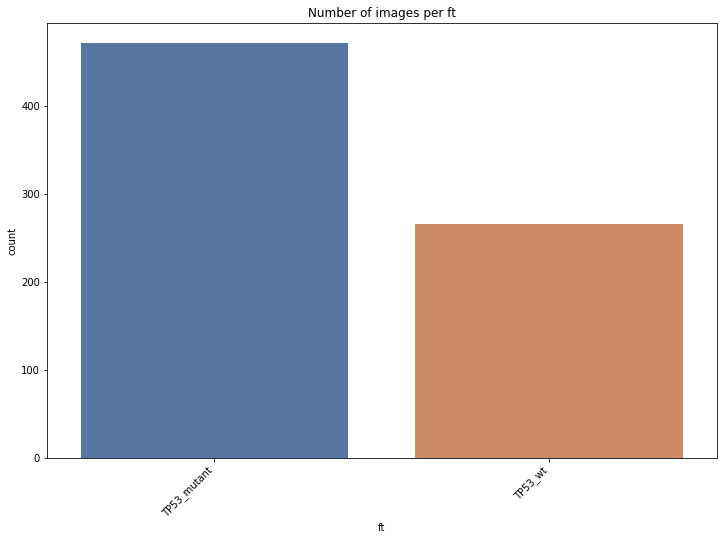

In [63]:
plot_ft_many(mut_df,'ft', name= '')